In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
matplotlib.rcParams.update(new_rc_params)

In [3]:
with open('archive/instances_default_original.json', 'r') as f:
    annot_json = json.load(f)

images_df = pd.DataFrame(annot_json['images'])
annot_df = pd.DataFrame(annot_json['annotations'])

In [4]:
labels = pd.read_csv('annotations/labels.csv')
labels.columns = ['file', 'insect1', 'insect2', 'insect3', 'insect4']

rep_dict = {'p' : 'Polistes', 'dip' : 'Diptera'}
labels['insect4'] = labels['insect4'].replace(rep_dict)

In [5]:
insects_df = labels.drop(columns=['file'])
counts = insects_df.stack().value_counts()

In [6]:
melted = labels.melt(id_vars=['file'], var_name='Insect', value_name='ID').dropna()
bombus_counts = melted[melted['ID'].str.startswith('Bombus')]['ID'].value_counts()

In [7]:
cols = ['insect1', 'insect2', 'insect3', 'insect4']

collapsed_labels = labels.copy()

for col in cols:
    collapsed_labels[col] = collapsed_labels.apply(lambda row: row[col].split(' ', 1)[0] if (pd.notna(row[col]) and row[col].startswith('Bombus')) else row[col], axis=1)

counts_collapsed = collapsed_labels.drop(columns=['file']).stack().value_counts()
counts2 = counts_collapsed.copy()

counts_collapsed = counts_collapsed.drop(['unknown', 'No subject', 'Coccinellidae larvae'])


In [8]:
# colors = plt.cm.tab20(np.arange(len(counts)))


# plt.figure(figsize=(10, 6))
# bars = plt.barh(counts_collapsed.index, counts_collapsed.values, color=colors)

# for bar in bars:
#     plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2, 
#              str(bar.get_width()), 
#              va='center', ha='center', color='black')


# plt.xlabel('Counts')
# plt.ylabel('Taxonomic groups')
# plt.xlim(0, 2400)

# plt.tight_layout()
# plt.savefig('tax_counts.svg', format='svg')

In [9]:
# colors = plt.cm.tab20(np.arange(len(counts)))


# plt.figure(figsize=(10, 6))
# bars = plt.barh(counts.index, counts.values, color=colors)

# for bar in bars:
#     plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2, 
#              str(bar.get_width()), 
#              va='center', ha='center', color='black')


# plt.xlabel('Counts')
# plt.ylabel('Values')

# plt.tight_layout()



In [10]:
taxon = pd.read_csv('annotations/taxonomy.csv')

In [11]:
categories = [{'id': idx+1, 'name': val, 'supercategory': ''} for idx, val in enumerate(counts_collapsed.index)]
categories[1]['name'] = 'Coccinellidae'

In [12]:
categories

[{'id': 1, 'name': 'Polistes', 'supercategory': ''},
 {'id': 2, 'name': 'Coccinellidae', 'supercategory': ''},
 {'id': 3, 'name': 'Apis mellifera', 'supercategory': ''},
 {'id': 4, 'name': 'Meloidae', 'supercategory': ''},
 {'id': 5, 'name': 'Lasioglossum', 'supercategory': ''},
 {'id': 6, 'name': 'Diptera', 'supercategory': ''},
 {'id': 7, 'name': 'Halictus', 'supercategory': ''},
 {'id': 8, 'name': 'Bombus', 'supercategory': ''},
 {'id': 9, 'name': 'Eucera', 'supercategory': ''},
 {'id': 10, 'name': 'Syrphidae', 'supercategory': ''},
 {'id': 11, 'name': 'Asilidae', 'supercategory': ''},
 {'id': 12, 'name': 'Heteroptera', 'supercategory': ''},
 {'id': 13, 'name': 'Osmia', 'supercategory': ''},
 {'id': 14, 'name': 'Odonata', 'supercategory': ''},
 {'id': 15, 'name': 'Bombyliidae', 'supercategory': ''},
 {'id': 16, 'name': 'Andrena', 'supercategory': ''},
 {'id': 17, 'name': 'Coleoptera', 'supercategory': ''},
 {'id': 18, 'name': 'Megachile', 'supercategory': ''},
 {'id': 19, 'name': 'S

In [13]:
single_insect_imgs = labels[labels['insect2'].isna()]['file'].tolist()
single_insect_ids = images_df[images_df['file_name'].isin(single_insect_imgs)]
single_insect_ids = single_insect_ids[['id', 'file_name']]

In [14]:
merged_df = single_insect_ids.merge(labels, left_on='file_name', right_on='file', how='right').drop(columns=['file', 'insect2', 'insect3', 'insect4'])
merged_df['insect1'] = collapsed_labels.apply(lambda row: row['insect1'].split(' ', 1)[0] if row['insect1'].startswith('Bombus') else row['insect1'], axis=1)

In [15]:
replace_dict = {'Coccinellidae adult' : 'Coccinellidae'}
merged_df['insect1'] = merged_df['insect1'].replace(replace_dict)
merged_df['insect1'].value_counts()

insect1
Polistes                1779
Coccinellidae           1214
Meloidae                 979
Lasioglossum             721
Diptera                  680
Halictus                 523
Bombus                   328
Eucera                   272
Syrphidae                110
Asilidae                  78
Apis mellifera            64
Osmia                     57
Odonata                   38
Bombyliidae               33
Andrena                   32
Heteroptera               28
Megachile                 23
No subject                19
Sphecidae                 15
Stratiomyidae              8
Dianthidium                8
Vespinae                   7
Crabronidae                6
Coelioxys                  5
Coccinellidae larvae       5
unknown                    2
Agapostemon                2
Coleoptera                 1
Eumeninae                  1
Melissodes                 1
Name: count, dtype: int64

In [16]:
lookup_dict = {item['name']: item['id'] for item in categories}
merged_df['cat_id'] = merged_df['insect1'].map(lookup_dict)
merged_df = merged_df.dropna()
merged_df['cat_id'] = merged_df['cat_id'].astype(int)
merged_df['id'] = merged_df['id'].astype(int)

In [17]:
mapping = merged_df.set_index('id')['cat_id']

mask = annot_df['image_id'].isin(merged_df['id'])
annot_df.loc[mask, 'category_id'] = annot_df.loc[mask, 'image_id'].map(mapping)

#annot_df.to_csv('annot_update.csv')

In [18]:
mask = annot_df['image_id'].duplicated(keep=False)

duplicated_rows = annot_df[mask]

duplicated_rows = duplicated_rows.merge(images_df, left_on='image_id', right_on='id', how='left')

duplicated_rows
duplicated_rows = duplicated_rows[['id_x', 'image_id', 'file_name', 'category_id', 'area', 'bbox']]
duplicated_rows
#duplicated_rows.to_csv('dup_rows_id.csv')


,id_x,image_id,file_name,category_id,area,bbox
0,17,17,0018.jpg,1,14255.5149,"[1037.63, 526.34, 132.77, 107.37]"
1,18,17,0018.jpg,1,20127.5459,"[1670.51, 1143.71, 161.81, 124.39]"
2,19,18,0019.jpg,1,15948.5612,"[980.93, 467.52, 108.28, 147.29]"
3,20,18,0019.jpg,1,14742.3680,"[1075.06, 601.15, 110.72, 133.15]"
4,22,20,0021.jpg,1,11655.3960,"[1129.71, 577.78, 113.8, 102.42]"
...,...,...,...,...,...,...
3393,8819,6931,7014.jpg,1,22840.5476,"[348.76, 411.63, 134.84, 169.39]"
3394,8825,6937,7020.jpg,1,44505.4632,"[860.32, 784.89, 219.12, 203.11]"
3395,8826,6937,7020.jpg,1,11429.1420,"[904.27, 567.5, 79.98, 142.9]"
3396,8845,6956,7039.jpg,1,11737.7538,"[1012.88, 623.16, 114.47, 102.54]"


In [19]:
dup_row_list = duplicated_rows['image_id'].unique()
dup_imgs_list = images_df[images_df['id'].isin(dup_row_list)]['file_name'].tolist()

In [20]:
# import os
# import shutil

# for filename in os.listdir('imgs'):
#     if filename in dup_imgs_list:
#         source = os.path.join('imgs', filename)
#         destination = os.path.join('dup_imgs', filename)
#         shutil.copy(source, destination)

In [21]:
mask1 = (labels['insect1'].notna()) & (labels[['insect2', 'insect3', 'insect4']].isna().all(axis=1))
labels = labels[~mask1]


def combine_with_lookup(val):
    if val in lookup_dict:
        return f"{val} - {lookup_dict[val]}"
    return val

labels[['insect1', 'insect2', 'insect3', 'insect4']] = labels[['insect1', 'insect2', 'insect3', 'insect4']].applymap(combine_with_lookup)

# Replace NaNs with ''
labels = labels.fillna('')

#labels.to_csv('dup_labels.csv')

In [22]:
update_annot = pd.read_csv('csvs/mult_insect_imgs_filled.csv')

In [23]:
update_cat_id = update_annot[['id_x', 'category_id']]


In [24]:
merge_df = annot_df.merge(update_cat_id, left_on='id', right_on='id_x', how='left')

In [25]:
merge_df['category_id_x'] = merge_df['category_id_y'].combine_first(merge_df['category_id_x'])
merge_df['category_id_x'] = merge_df['category_id_x'].astype(int)
merge_df = merge_df.drop(columns=['id_x', 'category_id_y'])
merge_df.columns = ['id', 'image_id', 'category_id', 'segmentation', 'area', 'bbox',
       'iscrowd', 'attributes']

In [26]:
reverse_lookup_dict = {value: key for key, value in lookup_dict.items()}
just_file_names = images_df[['id', 'file_name']]
bbox_df = merge_df.merge(just_file_names, left_on='image_id', right_on='id', how='left').drop(columns=['id_x', 'id_y'])
bbox_df['category'] = bbox_df['category_id'].map(reverse_lookup_dict)


In [27]:
import cv2

In [28]:
import ast

In [29]:
new_bbox_df = pd.read_csv('csvs/post_val_annot_corrected.csv')
new_bbox_df['bbox'] = new_bbox_df['bbox'].apply(lambda x: ast.literal_eval(x))

In [30]:
new_bbox_df

,Unnamed: 0,image_id,category_id,segmentation,area,bbox,iscrowd,attributes,file_name,category
0,0,1,7,[],3544.5768,"[1201.04, 495.68, 58.53, 60.56]",0,"{'occluded': False, 'rotation': 0.0}",0001.jpg,Halictus
1,1,2,7,[],1296.1629,"[1187.03, 555.61, 29.79, 43.51]",0,"{'occluded': False, 'rotation': 0.0}",0002.jpg,Halictus
2,2,3,7,[],1116.1194,"[1186.64, 559.78, 28.93, 38.58]",0,"{'occluded': False, 'rotation': 0.0}",0003.jpg,Halictus
3,3,4,7,[],1143.6764,"[1187.03, 559.87, 29.56, 38.69]",0,"{'occluded': False, 'rotation': 0.0}",0004.jpg,Halictus
4,4,5,7,[],1266.3000,"[1185.5, 559.1, 31.5, 40.2]",0,"{'occluded': False, 'rotation': 0.0}",0005.jpg,Halictus
...,...,...,...,...,...,...,...,...,...,...
8842,8842,6954,5,[],2442.1480,"[410.66, 324.21, 53.65, 45.52]",0,"{'occluded': False, 'rotation': 0.0}",7037.jpg,Lasioglossum
8843,8843,6955,18,[],10299.8588,"[1559.31, 567.03, 84.28, 122.21]",0,"{'occluded': False, 'rotation': 0.0}",7038.jpg,Megachile
8844,8844,6956,1,[],11737.7538,"[1012.88, 623.16, 114.47, 102.54]",0,"{'occluded': False, 'rotation': 0.0}",7039.jpg,Polistes
8845,8845,6956,3,[],21512.9088,"[807.1, 524.14, 135.54, 158.72]",0,"{'occluded': False, 'rotation': 0.0}",7039.jpg,Apis mellifera


In [31]:
# img_dir = 'imgs'
# output_dir = 'bbox_imgs'

# for file in new_bbox_df['file_name'].unique():
#     image_path = f"{img_dir}/{file}"
#     image = cv2.imread(image_path)

#     for _, row in new_bbox_df[new_bbox_df['file_name'] == file].iterrows():
#         x, y, w, h = row['bbox']
#         label = row['category']


#         cv2.rectangle(image, (int(x), int(y)), (int(x+w), int(y+h)), (0, 0, 255), 2)
        

#         font = cv2.FONT_HERSHEY_SIMPLEX
#         text_size = cv2.getTextSize(label, font, 0.5, 2)[0]
        
#         if y - 20 - text_size[1] < 0:
#             text_pos = (int(x), int(y) + int(h) + text_size[1])
#         else:
#             text_pos = (int(x), int(y) - 10)
        
#         cv2.putText(image, label, text_pos, font, 1, (0, 0, 255), 2)

#     try:
#         cv2.imwrite(f"{output_dir}/{file}", image)
#     except:
#         print('failed to save', file)




In [32]:
cols = ['insect1', 'insect2', 'insect3', 'insect4']

collapsed_labels = labels.copy()

for col in cols:
    collapsed_labels[col] = collapsed_labels.apply(lambda row: row[col].split(' ', 1)[0] if (pd.notna(row[col]) and row[col].startswith('Bombus')) else row[col], axis=1)

counts_collapsed = collapsed_labels.drop(columns=['file']).stack().value_counts()
counts2 = counts_collapsed.copy()

#counts_collapsed = counts_collapsed.drop(['unknown', 'No subject', 'Coccinellidae larvae'])

In [33]:
insect_counts = new_bbox_df['category'].value_counts()

mask = insect_counts<16
sum_others = insect_counts[mask].sum()
insect_counts = insect_counts[~mask]
insect_counts['Other insects'] = sum_others

In [34]:
new_bbox_df['file_no'] = new_bbox_df['file_name'].str[:-4].astype(int)

In [35]:
new_bbox_df

,Unnamed: 0,image_id,category_id,segmentation,area,bbox,iscrowd,attributes,file_name,category,file_no
0,0,1,7,[],3544.5768,"[1201.04, 495.68, 58.53, 60.56]",0,"{'occluded': False, 'rotation': 0.0}",0001.jpg,Halictus,1
1,1,2,7,[],1296.1629,"[1187.03, 555.61, 29.79, 43.51]",0,"{'occluded': False, 'rotation': 0.0}",0002.jpg,Halictus,2
2,2,3,7,[],1116.1194,"[1186.64, 559.78, 28.93, 38.58]",0,"{'occluded': False, 'rotation': 0.0}",0003.jpg,Halictus,3
3,3,4,7,[],1143.6764,"[1187.03, 559.87, 29.56, 38.69]",0,"{'occluded': False, 'rotation': 0.0}",0004.jpg,Halictus,4
4,4,5,7,[],1266.3000,"[1185.5, 559.1, 31.5, 40.2]",0,"{'occluded': False, 'rotation': 0.0}",0005.jpg,Halictus,5
...,...,...,...,...,...,...,...,...,...,...,...
8842,8842,6954,5,[],2442.1480,"[410.66, 324.21, 53.65, 45.52]",0,"{'occluded': False, 'rotation': 0.0}",7037.jpg,Lasioglossum,7037
8843,8843,6955,18,[],10299.8588,"[1559.31, 567.03, 84.28, 122.21]",0,"{'occluded': False, 'rotation': 0.0}",7038.jpg,Megachile,7038
8844,8844,6956,1,[],11737.7538,"[1012.88, 623.16, 114.47, 102.54]",0,"{'occluded': False, 'rotation': 0.0}",7039.jpg,Polistes,7039
8845,8845,6956,3,[],21512.9088,"[807.1, 524.14, 135.54, 158.72]",0,"{'occluded': False, 'rotation': 0.0}",7039.jpg,Apis mellifera,7039


In [36]:
df_resize = new_bbox_df[(new_bbox_df['file_no'] >= 3589) & (new_bbox_df['file_no'] <= 3600)]
df_resize['bbox'] = df_resize['bbox'].apply(lambda lst: [x / 2 for x in lst])
df_resize


/tmp/ipykernel_3462571/174203337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resize['bbox'] = df_resize['bbox'].apply(lambda lst: [x / 2 for x in lst])


,Unnamed: 0,image_id,category_id,segmentation,area,bbox,iscrowd,attributes,file_name,category,file_no
3757,3757,3536,4,[],117054.7053,"[1080.23, 191.275, 173.615, 168.555]",0,"{'occluded': False, 'rotation': 0.0}",3589.jpg,Meloidae,3589
3758,3758,3537,5,[],8465.5265,"[723.75, 835.125, 45.725, 46.285]",0,"{'occluded': False, 'rotation': 0.0}",3590.jpg,Lasioglossum,3590
3759,3759,3538,5,[],7235.9196,"[1761.08, 378.975, 59.34, 30.485]",0,"{'occluded': False, 'rotation': 0.0}",3591.jpg,Lasioglossum,3591
3760,3760,3539,5,[],7763.9850,"[1773.89, 104.54, 49.75, 39.015]",0,"{'occluded': False, 'rotation': 0.0}",3592.jpg,Lasioglossum,3592
3761,3761,3540,5,[],8960.8965,"[551.805, 377.715, 52.495, 42.675]",0,"{'occluded': False, 'rotation': 0.0}",3593.jpg,Lasioglossum,3593
3762,3762,3541,4,[],86423.2278,"[1445.17, 1096.11, 151.19, 142.905]",0,"{'occluded': False, 'rotation': 0.0}",3594.jpg,Meloidae,3594
3763,3763,3542,4,[],35744.3643,"[1970.275, 1218.855, 115.835, 77.145]",0,"{'occluded': True, 'rotation': 0.0}",3595.jpg,Meloidae,3595
3764,3764,3543,7,[],10154.0175,"[5.67, 106.625, 45.925, 55.275]",0,"{'occluded': False, 'rotation': 0.0}",3596.jpg,Halictus,3596
3765,3765,3544,5,[],6166.7538,"[1770.475, 605.885, 46.29, 33.305]",0,"{'occluded': False, 'rotation': 0.0}",3597.jpg,Lasioglossum,3597
3766,3766,3545,5,[],4445.0000,"[1684.055, 597.73, 25.4, 43.75]",0,"{'occluded': False, 'rotation': 0.0}",3598.jpg,Lasioglossum,3598


In [37]:
new_bbox_df.update(df_resize)

In [38]:
new_bbox_df.iloc[3757:3768]

,Unnamed: 0,image_id,category_id,segmentation,area,bbox,iscrowd,attributes,file_name,category,file_no
3757,3757,3536,4,[],117054.7053,"[1080.23, 191.275, 173.615, 168.555]",0,"{'occluded': False, 'rotation': 0.0}",3589.jpg,Meloidae,3589
3758,3758,3537,5,[],8465.5265,"[723.75, 835.125, 45.725, 46.285]",0,"{'occluded': False, 'rotation': 0.0}",3590.jpg,Lasioglossum,3590
3759,3759,3538,5,[],7235.9196,"[1761.08, 378.975, 59.34, 30.485]",0,"{'occluded': False, 'rotation': 0.0}",3591.jpg,Lasioglossum,3591
3760,3760,3539,5,[],7763.9850,"[1773.89, 104.54, 49.75, 39.015]",0,"{'occluded': False, 'rotation': 0.0}",3592.jpg,Lasioglossum,3592
3761,3761,3540,5,[],8960.8965,"[551.805, 377.715, 52.495, 42.675]",0,"{'occluded': False, 'rotation': 0.0}",3593.jpg,Lasioglossum,3593
3762,3762,3541,4,[],86423.2278,"[1445.17, 1096.11, 151.19, 142.905]",0,"{'occluded': False, 'rotation': 0.0}",3594.jpg,Meloidae,3594
3763,3763,3542,4,[],35744.3643,"[1970.275, 1218.855, 115.835, 77.145]",0,"{'occluded': True, 'rotation': 0.0}",3595.jpg,Meloidae,3595
3764,3764,3543,7,[],10154.0175,"[5.67, 106.625, 45.925, 55.275]",0,"{'occluded': False, 'rotation': 0.0}",3596.jpg,Halictus,3596
3765,3765,3544,5,[],6166.7538,"[1770.475, 605.885, 46.29, 33.305]",0,"{'occluded': False, 'rotation': 0.0}",3597.jpg,Lasioglossum,3597
3766,3766,3545,5,[],4445.0000,"[1684.055, 597.73, 25.4, 43.75]",0,"{'occluded': False, 'rotation': 0.0}",3598.jpg,Lasioglossum,3598


In [39]:
# img_dir = 'resize_test'
# output_dir = 'resize_test/output/'

# for file in df_resize['file_name'].unique():
#     image_path = f"{img_dir}/{file}"
#     image = cv2.imread(image_path)

#     for _, row in df_resize[df_resize['file_name'] == file].iterrows():
#         x, y, w, h = row['bbox']
#         label = row['category']


#         cv2.rectangle(image, (int(x), int(y)), (int(x+w), int(y+h)), (0, 0, 255), 2)
        

#         font = cv2.FONT_HERSHEY_SIMPLEX
#         text_size = cv2.getTextSize(label, font, 0.5, 2)[0]
        
#         if y - 20 - text_size[1] < 0:
#             text_pos = (int(x), int(y) + int(h) + text_size[1])
#         else:
#             text_pos = (int(x), int(y) - 10)
        
#         cv2.putText(image, label, text_pos, font, 1, (0, 0, 255), 2)

#     try:
#         cv2.imwrite(f"{output_dir}/{file}", image)
#     except:
#         print('failed to save', file)


In [40]:
# colors = plt.cm.tab20(np.arange(len(insect_counts)))


# plt.figure(figsize=(10, 6))
# bars = plt.barh(insect_counts.index, insect_counts.values, color=colors)

# for bar in bars:
#     plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2, 
#              str(bar.get_width()), 
#              va='center', ha='center', color='black')


# plt.xlabel('Counts')
# plt.ylabel('Taxonomic groups')
# plt.xlim(0, 2450)

# plt.tight_layout()
#plt.savefig('tax_counts_condensed.svg', format='svg')

In [41]:
# import matplotlib.colors as mcolors

# # Start and end colors in RGB
# start_pink_rgb = [255, 182, 193]  # LightPink
# end_pink_rgb = [255, 20, 147]     # DeepPink

# # Convert RGB values [0, 255] to [0, 1] range
# start_pink = [i/255.0 for i in start_pink_rgb]
# end_pink = [i/255.0 for i in end_pink_rgb]

# # Convert RGB to HSV
# start_hsv = mcolors.rgb_to_hsv(start_pink)
# end_hsv = mcolors.rgb_to_hsv(end_pink)

# # Vary the value (brightness) for contrast
# values = np.linspace(start_hsv[2], end_hsv[2], 8)

# colors = []

# for val in values:
#     new_hsv = [start_hsv[0], start_hsv[1], val]
#     new_rgb = mcolors.hsv_to_rgb(new_hsv)
#     colors.append(new_rgb)

In [42]:
# start_pink = np.array([255, 182, 150])  # LightPink in RGB
# end_pink = np.array([255, 90, 150])   # HotPink in RGB

# # Linearly interpolate to get 8 shades
# shades = np.linspace(start_pink, end_pink, 8)

# # Convert RGB values to range [0, 1]
# colors = shades / 255


# plt.figure(figsize=(6, 2.8))
# bars = plt.barh(bombus_counts.index, bombus_counts.values, color=colors)

# for bar in bars:
#     plt.text(bar.get_width() + 15, bar.get_y() + bar.get_height()/2, 
#              str(bar.get_width()), 
#              va='center', ha='center', color='black')


# ax = plt.gca()
# for spine in ["right", "top"]:
#     ax.spines[spine].set_visible(False)
# plt.xlim(0, 250)

# plt.tight_layout()
#plt.savefig('bombus_counts.svg', format='svg')

In [43]:
new_bbox_df = new_bbox_df.drop(columns=['category', 'file_name', 'file_no'])

In [44]:
new_bbox_df.columns = ['id', 'image_id', 'category_id', 'segmentation', 'area', 'bbox',
       'iscrowd', 'attributes']

In [45]:
new_bbox_df['id'] = new_bbox_df['id'] + 1

In [46]:
new_bbox_df[['id', 'image_id', 'category_id',
       'iscrowd']] = new_bbox_df[['id', 'image_id', 'category_id',
       'iscrowd']].astype(int)

In [47]:
new_bbox_df

,id,image_id,category_id,segmentation,area,bbox,iscrowd,attributes
0,1,1,7,[],3544.5768,"[1201.04, 495.68, 58.53, 60.56]",0,"{'occluded': False, 'rotation': 0.0}"
1,2,2,7,[],1296.1629,"[1187.03, 555.61, 29.79, 43.51]",0,"{'occluded': False, 'rotation': 0.0}"
2,3,3,7,[],1116.1194,"[1186.64, 559.78, 28.93, 38.58]",0,"{'occluded': False, 'rotation': 0.0}"
3,4,4,7,[],1143.6764,"[1187.03, 559.87, 29.56, 38.69]",0,"{'occluded': False, 'rotation': 0.0}"
4,5,5,7,[],1266.3000,"[1185.5, 559.1, 31.5, 40.2]",0,"{'occluded': False, 'rotation': 0.0}"
...,...,...,...,...,...,...,...,...
8842,8843,6954,5,[],2442.1480,"[410.66, 324.21, 53.65, 45.52]",0,"{'occluded': False, 'rotation': 0.0}"
8843,8844,6955,18,[],10299.8588,"[1559.31, 567.03, 84.28, 122.21]",0,"{'occluded': False, 'rotation': 0.0}"
8844,8845,6956,1,[],11737.7538,"[1012.88, 623.16, 114.47, 102.54]",0,"{'occluded': False, 'rotation': 0.0}"
8845,8846,6956,3,[],21512.9088,"[807.1, 524.14, 135.54, 158.72]",0,"{'occluded': False, 'rotation': 0.0}"


In [48]:
cat_for_img = new_bbox_df.groupby('image_id')['category_id'].agg(lambda x: list(set(x))).reset_index()
good_cats = [x for x in range(8,30)]

In [49]:
df_common_insects = cat_for_img[cat_for_img['category_id'].apply(lambda x: not any(item in good_cats for item in x))]
df_rare_insects = cat_for_img[cat_for_img['category_id'].apply(lambda x: any(item in good_cats for item in x))]

list_common_insect_imgs = df_common_insects['image_id'].tolist()
list_rare_insect_imgs = df_rare_insects['image_id'].tolist()


In [62]:
list_polist_only = df_common_insects[df_common_insects['category_id'].apply(lambda x: x == [1])]['image_id'].tolist()

# Decide how infrequently to sample common insects here:

In [63]:
list_common_insect_imgs_reduced = list_common_insect_imgs[::4]
list_polist_only = list_polist_only[::2]

In [64]:
data = annot_json['images']

for item in data:
    file_name = item['file_name']
    item['width'] = 2304
    item['height'] = 1296
        
json_images_resize = data


In [65]:
image_df = pd.DataFrame(json_images_resize)
image_df

,id,width,height,file_name,license,flickr_url,coco_url,date_captured
0,1,2304,1296,0001.jpg,0,,,0
1,2,2304,1296,0002.jpg,0,,,0
2,3,2304,1296,0003.jpg,0,,,0
3,4,2304,1296,0004.jpg,0,,,0
4,5,2304,1296,0005.jpg,0,,,0
...,...,...,...,...,...,...,...,...
6952,6953,2304,1296,7036.jpg,0,,,0
6953,6954,2304,1296,7037.jpg,0,,,0
6954,6955,2304,1296,7038.jpg,0,,,0
6955,6956,2304,1296,7039.jpg,0,,,0


In [72]:
df_keep_all = image_df[image_df['id'].isin(list_rare_insect_imgs)]
df_keep_some = image_df[image_df['id'].isin(list_common_insect_imgs_reduced)]
combined_df = pd.concat([df_keep_all, df_keep_some], ignore_index=True)

sorted_df = combined_df.sort_values(by='id').reset_index(drop=True)


In [74]:
sorted_df = sorted_df[~sorted_df['id'].isin(list_polist_only)]

In [75]:
sorted_df

,id,width,height,file_name,license,flickr_url,coco_url,date_captured
0,1,2304,1296,0001.jpg,0,,,0
1,5,2304,1296,0005.jpg,0,,,0
2,9,2304,1296,0009.jpg,0,,,0
3,13,2304,1296,0014.jpg,0,,,0
4,17,2304,1296,0018.jpg,0,,,0
...,...,...,...,...,...,...,...,...
2628,6950,2304,1296,7033.jpg,0,,,0
2629,6951,2304,1296,7034.jpg,0,,,0
2630,6952,2304,1296,7035.jpg,0,,,0
2631,6955,2304,1296,7038.jpg,0,,,0


In [76]:
new_filenames = pd.read_csv('csvs/names_metadata.csv', index_col=0, dtype=str)
new_filenames['file'] = new_filenames['file']+'.jpg'
new_filenames['file_new'] = new_filenames['file_new']+'.jpg'
rename_dict = dict(zip(new_filenames['file'], new_filenames['file_new']))

In [69]:
#new_filenames.to_csv('csvs/for_file_renaming.csv',header=False, index=False)

In [77]:
sorted_df['file_name'] = sorted_df['file_name'].replace(rename_dict)


/tmp/ipykernel_3462571/1040286390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_df['file_name'] = sorted_df['file_name'].replace(rename_dict)


,id,width,height,file_name,license,flickr_url,coco_url,date_captured
0,1,2304,1296,0001_t2_fs_20220912.jpg,0,,,0
1,5,2304,1296,0005_t2_fs_20220912.jpg,0,,,0
2,9,2304,1296,0009_t2_fs_20220912.jpg,0,,,0
3,13,2304,1296,0014_t2_fs_20220912.jpg,0,,,0
4,17,2304,1296,0018_t2_fs_20220912.jpg,0,,,0
...,...,...,...,...,...,...,...,...
2628,6950,2304,1296,7033_t4_fn_20230720.jpg,0,,,0
2629,6951,2304,1296,7034_t4_fn_20230720.jpg,0,,,0
2630,6952,2304,1296,7035_t4_fn_20230720.jpg,0,,,0
2631,6955,2304,1296,7038_t4_fn_20230720.jpg,0,,,0


In [71]:

sorted_df

,id,width,height,file_name,license,flickr_url,coco_url,date_captured
0,1,2304,1296,0001_t2_fs_20220912.jpg,0,,,0
1,5,2304,1296,0005_t2_fs_20220912.jpg,0,,,0
2,9,2304,1296,0009_t2_fs_20220912.jpg,0,,,0
3,13,2304,1296,0014_t2_fs_20220912.jpg,0,,,0
4,17,2304,1296,0018_t2_fs_20220912.jpg,0,,,0
...,...,...,...,...,...,...,...,...
2628,6950,2304,1296,7033_t4_fn_20230720.jpg,0,,,0
2629,6951,2304,1296,7034_t4_fn_20230720.jpg,0,,,0
2630,6952,2304,1296,7035_t4_fn_20230720.jpg,0,,,0
2631,6955,2304,1296,7038_t4_fn_20230720.jpg,0,,,0


In [78]:
json_images_rename = json.loads(sorted_df.to_json(orient = 'records'))

In [79]:
annot_json['images'] = json_images_rename

In [80]:
new_bbox_df = new_bbox_df[new_bbox_df['image_id'].isin(sorted_df['id'])]

In [81]:
annot_update = new_bbox_df.to_json(orient = 'records')

In [82]:
annot_update = json.loads(annot_update)

In [83]:
annot_json['annotations'] = annot_update

In [84]:
annot_json['categories'] = categories

In [85]:
json_out = json.dumps(annot_json, indent=1)

In [86]:
with open('instances_default_fewer_polistes.json', 'w') as f:
    f.write(json_out)

In [87]:
new_bbox_df

,id,image_id,category_id,segmentation,area,bbox,iscrowd,attributes
0,1,1,7,[],3544.5768,"[1201.04, 495.68, 58.53, 60.56]",0,"{'occluded': False, 'rotation': 0.0}"
4,5,5,7,[],1266.3000,"[1185.5, 559.1, 31.5, 40.2]",0,"{'occluded': False, 'rotation': 0.0}"
8,9,9,7,[],1296.7165,"[1187.06, 562.2, 35.95, 36.07]",0,"{'occluded': False, 'rotation': 0.0}"
12,13,13,7,[],2584.3090,"[1192.52, 570.15, 40.57, 63.7]",0,"{'occluded': False, 'rotation': 0.0}"
16,17,17,1,[],14255.5149,"[1037.63, 526.34, 132.77, 107.37]",0,"{'occluded': False, 'rotation': 0.0}"
...,...,...,...,...,...,...,...,...
8838,8839,6950,8,[],21078.8382,"[1302.09, 531.53, 128.17, 164.46]",0,"{'occluded': False, 'rotation': 0.0}"
8839,8840,6951,18,[],6000.0820,"[584.85, 0.0, 89.42, 67.1]",0,"{'occluded': True, 'rotation': 0.0}"
8840,8841,6952,1,[],6514.3260,"[386.41, 919.29, 87.3, 74.62]",0,"{'occluded': False, 'rotation': 0.0}"
8843,8844,6955,18,[],10299.8588,"[1559.31, 567.03, 84.28, 122.21]",0,"{'occluded': False, 'rotation': 0.0}"


In [ ]:
# import os

# image_dir = 'imgs_select'
# image_dir_out = 'imgs_select/output/'

# new_bbox_df['category'] = new_bbox_df['category_id'].map(reverse_lookup_dict)


# for index, row in sorted_df.iterrows():
#     image_path = os.path.join(image_dir, row['file_name'])
#     image = cv2.imread(image_path)

#     # Get the corresponding bounding boxes and categories from df2
#     boxes = new_bbox_df[new_bbox_df['image_id'] == row['id']]
    
#     for _, box_row in boxes.iterrows():
#         bbox = tuple(map(int, box_row['bbox']))
#         category = box_row['category']
        
#         cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[0]+bbox[2], bbox[1]+bbox[3]), (0, 0, 255), 2)

  
#         # Draw the category label
#         font = cv2.FONT_HERSHEY_SIMPLEX
#         font_scale = 0.5
#         font_thickness = 2
#         label_size = cv2.getTextSize(category, font, font_scale, font_thickness)[0]
#         label_rect_start = top_left
#         label_rect_end = (top_left[0] + label_size[0], top_left[1] - label_size[1] - 3)
#         cv2.rectangle(image, label_rect_start, label_rect_end, (0, 0, 255), -1)  # Filled red rectangle for label background
#         cv2.putText(image, category, (bbox[0], bbox[1]-5), font, font_scale, (255, 255, 255), font_thickness)

#     # Save the image
#     try:
#         cv2.imwrite(os.path.join(image_dir_out, 'annotated_' + row['file_name']), image)
#     except:
#         print('could not save',row['file_name'])


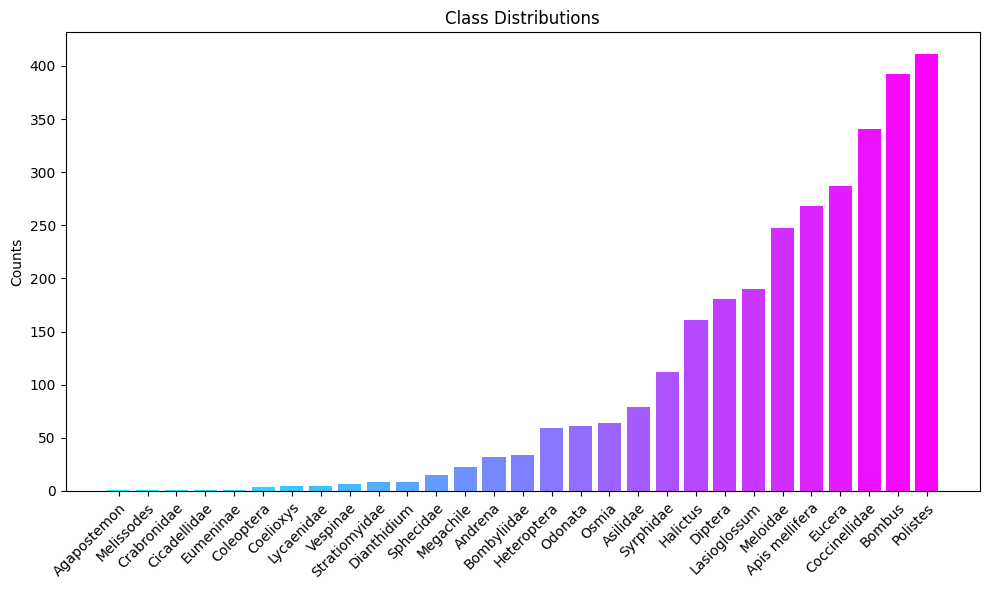

In [110]:

annots = pd.json_normalize(annot_json, record_path = ['annotations'])


cat_list = annot_json['categories']
cat_dict = {dic['id']:dic['name'] for dic in cat_list}

annots['category'] = annots['category_id'].map(cat_dict)
annot_class_counts = annots.groupby('category').size().sort_values()


index = np.arange(len(annot_class_counts))

colors = plt.cm.cool(np.linspace(0, 1, len(annot_class_counts)))


plt.figure(figsize=(10,6))
plt.bar(index, annot_class_counts, label='Training set', color=colors)

# Set up the plot

plt.ylabel('Counts')
plt.title('Class Distributions')
ax = plt.gca()
plt.xticks(index, annot_class_counts.index) 
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")


plt.tight_layout()
